<a href="https://colab.research.google.com/github/vifirsanova/empi/blob/main/KB/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

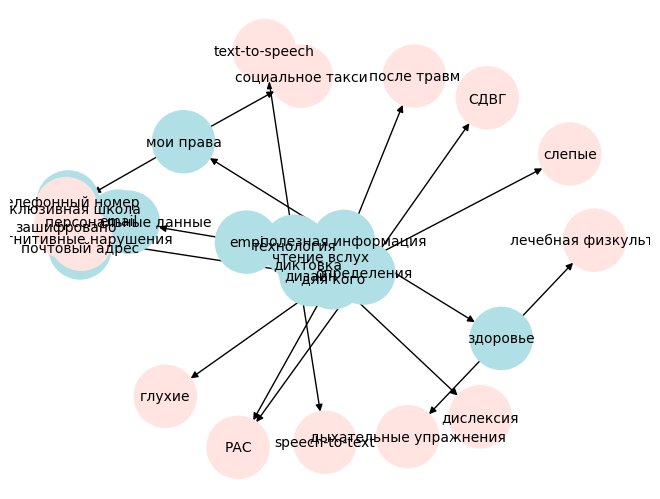

In [141]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def json_to_graph(json_data, graph=None, parent_node=None, parent_key=None):
    if graph is None:
        graph = nx.DiGraph()

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            graph.add_node(key, color='powderblue')  # Set node color
            if parent_node is not None:
                graph.add_edge(parent_node, key, label=str(parent_key))
            json_to_graph(value, graph, key, key)
    elif isinstance(json_data, list):
        for item in json_data:
            graph.add_node(item)
            if parent_node is not None:
                graph.add_edge(parent_node, item, label=str(parent_key))
            json_to_graph(item, graph, parent_key)
    else:
        graph.add_node(json_data, color='mistyrose')  # Set node color
        if parent_node is not None:
            graph.add_edge(parent_node, json_data, label=str(parent_key))

    return graph

# Example JSON data
json_data = {
    "empi":
     {
        "персональные данные":
            {
              "почтовый адрес": "зашифровано",
              "email": "зашифровано",
              "телефонный номер": "зашифровано"
            },
        "дизайн":
            {
              "диктовка":
                {
                    "технология": "speech-to-text",
                    "для кого": ["глухие", "после травм", "когнитивные нарушения", "дислексия"]
                },
              "чтение вслух":
                {
                    "технология": "text-to-speech",
                    "для кого": ["слепые", "РАС", "когнитивные нарушения", "дислексия"]
                },
            },
        "полезная информация":
        {
            "мои права": ["инклюзивная школа", "социальное такси"],
            "здоровье": ["дыхательные упражнения", "лечебная физкультура"],
            "определения": ["РАС", "СДВГ"]
        }
     }
}

# Convert JSON data to graph
graph = json_to_graph(json_data)

# Draw the graph with colorized nodes
pos = nx.spring_layout(graph, seed=42)
node_colors = [graph.nodes[node]['color'] for node in graph.nodes]
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10)
plt.show()

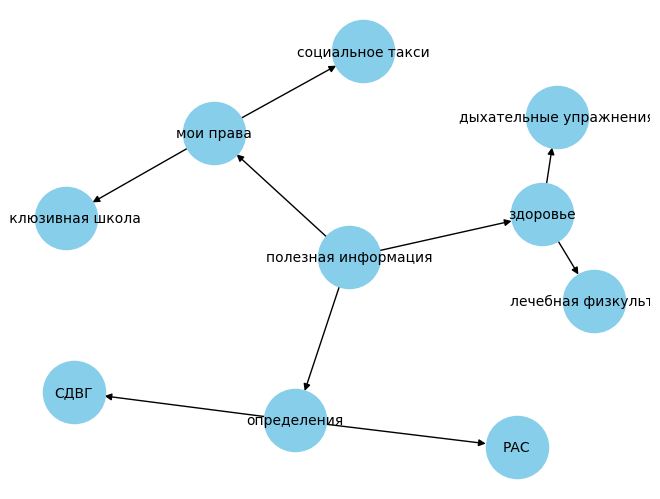

In [121]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='полезная информация', max_depth=3)

In [162]:
df = pd.DataFrame(json_data['empi']['дизайн'])
df.to_csv('data.csv', index=False)
df

,диктовка,чтение вслух
технология,speech-to-text,text-to-speech
для кого,"[глухие, после травм, когнитивные нарушения, д...","[слепые, РАС, когнитивные нарушения, дислексия]"
